### Muhammad Salman Khan - 25373
### Machine Learning II - Assignment 2

### Objective

The objective of this python notebook is to experiment on a regression problem. First, we will take a dataset and learn machine learning models on it and then we will find out the joint distribution of our training data and sample features and labels using that distribution and then train our model using that sampled data. At the end of the experiment we will try to draw some conclusion using the comparison of results.

In [1]:
## Importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import MyLazyPredict
from sklearn.mixture import GaussianMixture

In [2]:
## Loading the dataset

housing = fetch_california_housing()
features = pd.DataFrame(housing.data, columns=housing.feature_names)
target = pd.DataFrame(housing.target, columns=housing.target_names)
housing = pd.concat([features, target], axis=1)
print(housing.shape)
housing.head()

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.33,41.00,6.98,1.02,322.00,2.56,37.88,-122.23,4.53
1,8.30,21.00,6.24,0.97,2401.00,2.11,37.86,-122.22,3.58
2,7.26,52.00,8.29,1.07,496.00,2.80,37.85,-122.24,3.52
3,5.64,52.00,5.82,1.07,558.00,2.55,37.85,-122.25,3.41
4,3.85,52.00,6.28,1.08,565.00,2.18,37.85,-122.25,3.42


In [3]:
## Declaring features and target

X = housing.drop("MedHouseVal", axis=1)
y = housing["MedHouseVal"]

In [4]:
## Splitting the data into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8, random_state =42)
train_data = pd.concat([X_train, y_train], axis=1)

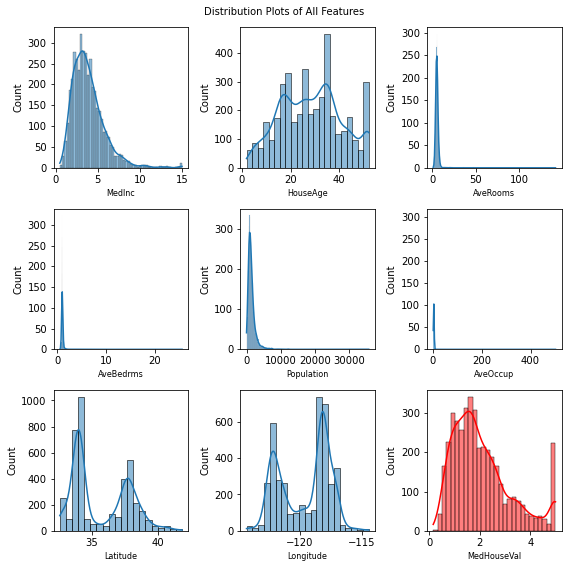

In [5]:
## visualizing train data distribution

fig, axes = plt.subplots(3, 3, figsize=(8,8))
fig.suptitle('Distribution Plots of All Features', size=10)

sns.histplot(ax=axes[0,0], x=train_data["MedInc"], kde=True)
axes[0,0].set_xlabel('MedInc', size=8)

sns.histplot(ax=axes[0,1], x=train_data["HouseAge"], kde=True)
axes[0,1].set_xlabel('HouseAge', size=8)

sns.histplot(ax=axes[0,2], x=train_data["AveRooms"], kde=True)
axes[0,2].set_xlabel('AveRooms', size=8)

sns.histplot(ax=axes[1,0], x=train_data["AveBedrms"], kde=True)
axes[1,0].set_xlabel('AveBedrms', size=8)

sns.histplot(ax=axes[1,1], x=train_data["Population"], kde=True)
axes[1,1].set_xlabel('Population', size=8)

sns.histplot(ax=axes[1,2], x=train_data["AveOccup"], kde=True)
axes[1,2].set_xlabel('AveOccup', size=8)

sns.histplot(ax=axes[2,0], x=train_data["Latitude"], kde=True)
axes[2,0].set_xlabel('Latitude', size=8)

sns.histplot(ax=axes[2,1], x=train_data["Longitude"], kde=True)
axes[2,1].set_xlabel('Longitude', size=8)

sns.histplot(ax=axes[2,2], x=train_data["MedHouseVal"], kde=True, color='red')
axes[2,2].set_xlabel('MedHouseVal', size=8)

plt.tight_layout()
plt.show()

Here, we can see that there are normal distribution in the data. Also, some of the features have multimodal distributions.

### Model Training on the Raw Data

For our first experiment, we will train our models with the raw train data and use the models to predict test records.

In [6]:
reg = MyLazyPredict.LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

100%|████████████████████████████████████████████████████████████████████████████| 21/21 [00:14<00:00,  1.41it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.81,0.81,0.50,0.20
XGBRegressor,0.79,0.79,0.52,0.64
GradientBoostingRegressor,0.78,0.78,0.55,0.81
RandomForestRegressor,0.77,0.77,0.55,2.88
MLPRegressor,0.76,0.76,0.57,2.72
BaggingRegressor,0.74,0.74,0.59,0.25
SVR,0.72,0.72,0.61,5.81
KNeighborsRegressor,0.65,0.65,0.69,0.59
BayesianRidge,0.61,0.61,0.72,0.02


Gradient Boosting regressors came out be the optimal models for this regression analysis. With the highest Adj. r2_score of 0.81. Random Forest, not much far behind.

### Joint Distribution of Training Data and Model Training

Now, we will learn the joint distribution of the train data and learn the models on data sample through that joint distribution.

In [7]:
gm = GaussianMixture(n_components=1, random_state=0).fit(train_data)
sampled_train_data = pd.DataFrame(gm.sample(len(X_train))[0], columns=housing.columns)
sampled_train_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.69,18.05,10.82,2.18,3593.37,-3.72,40.59,-123.88,2.00
1,5.00,26.05,7.26,1.40,1941.07,-8.10,35.88,-120.82,2.62
2,1.70,36.69,6.90,1.59,1822.02,23.61,37.75,-121.40,3.14
3,3.37,11.42,6.68,1.24,1211.25,-9.49,37.20,-119.49,-0.10
4,2.54,9.56,6.37,1.43,2941.71,6.06,33.02,-116.92,-0.63


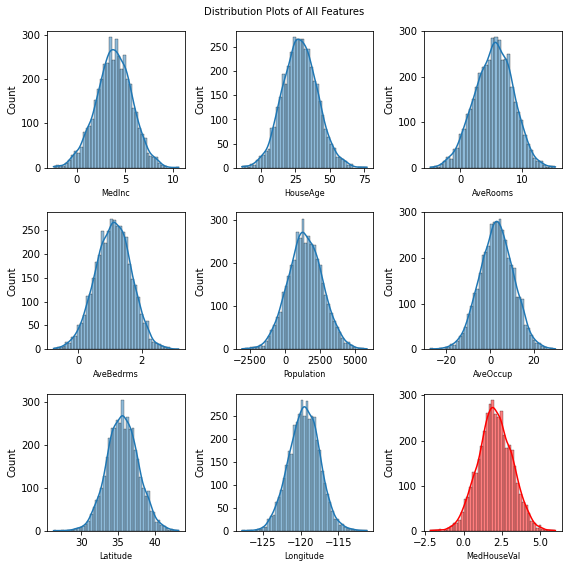

In [8]:
## visualizing feature variables

fig, axes = plt.subplots(3, 3, figsize=(8,8))
fig.suptitle('Distribution Plots of All Features', size=10)

sns.histplot(ax=axes[0,0], x=sampled_train_data["MedInc"], kde=True)
axes[0,0].set_xlabel('MedInc', size=8)

sns.histplot(ax=axes[0,1], x=sampled_train_data["HouseAge"], kde=True)
axes[0,1].set_xlabel('HouseAge', size=8)

sns.histplot(ax=axes[0,2], x=sampled_train_data["AveRooms"], kde=True)
axes[0,2].set_xlabel('AveRooms', size=8)

sns.histplot(ax=axes[1,0], x=sampled_train_data["AveBedrms"], kde=True)
axes[1,0].set_xlabel('AveBedrms', size=8)

sns.histplot(ax=axes[1,1], x=sampled_train_data["Population"], kde=True)
axes[1,1].set_xlabel('Population', size=8)

sns.histplot(ax=axes[1,2], x=sampled_train_data["AveOccup"], kde=True)
axes[1,2].set_xlabel('AveOccup', size=8)

sns.histplot(ax=axes[2,0], x=sampled_train_data["Latitude"], kde=True)
axes[2,0].set_xlabel('Latitude', size=8)

sns.histplot(ax=axes[2,1], x=sampled_train_data["Longitude"], kde=True)
axes[2,1].set_xlabel('Longitude', size=8)

sns.histplot(ax=axes[2,2], x=sampled_train_data["MedHouseVal"], kde=True, color='red')
axes[2,2].set_xlabel('MedHouseVal', size=8)

plt.tight_layout()
plt.show()

In [9]:
## Declaring Features and targets

X_train_sampled = sampled_train_data.drop("MedHouseVal", axis=1)
y_train_sampled = sampled_train_data["MedHouseVal"]

In [10]:
reg = MyLazyPredict.LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train_sampled, X_test, y_train_sampled, y_test)
models

 62%|███████████████████████████████████████████████                             | 13/21 [00:06<00:05,  1.47it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.


100%|████████████████████████████████████████████████████████████████████████████| 21/21 [00:16<00:00,  1.29it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LassoCV,0.60,0.60,0.72,0.09
LinearRegression,0.60,0.60,0.72,0.03
RidgeCV,0.60,0.60,0.72,0.03
Ridge,0.60,0.60,0.72,0.03
BayesianRidge,0.60,0.60,0.72,0.02
ElasticNetCV,0.60,0.60,0.72,0.15
LinearSVR,0.60,0.60,0.72,0.05
SGDRegressor,0.60,0.60,0.73,0.05
SVR,0.59,0.59,0.74,6.72


Now, we can see a differnce in metrics. But, still many of the models have succesfully captured some patterns in the dataset.

This time we have used all features and target variable to build our joint guassian distribution. We will now build the mixture using only feautures.

### Joint Distribution of Whole Data and Model Training

This will be an unusal step. But, just to experiment we are using our whole dataset including train and test data to learn joint distribution.

The assumption, here, is that now the models will better predict as compared to the last experiment.

In [11]:
gm = GaussianMixture(n_components=1, random_state=0).fit(housing)
sampled_train_data = pd.DataFrame(gm.sample(len(X_train))[0], columns=housing.columns)
sampled_train_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.04,31.82,10.43,1.57,-572.20,-8.85,40.04,-123.53,3.31
1,3.56,30.21,6.64,1.38,960.51,-12.36,36.86,-121.28,1.39
2,6.74,37.11,6.77,0.94,1070.96,30.22,37.48,-120.06,1.95
3,5.13,11.35,6.20,1.17,1637.41,-14.01,35.51,-120.00,4.12
4,4.29,18.21,2.58,0.71,32.20,4.49,34.90,-120.76,3.23


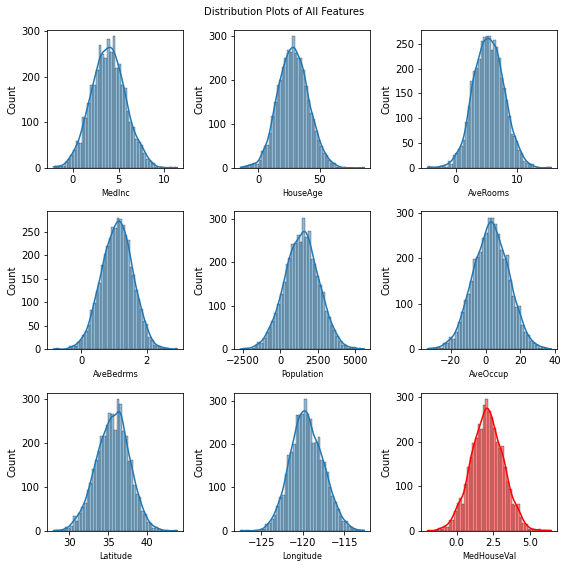

In [12]:
## visualizing feature variables

fig, axes = plt.subplots(3, 3, figsize=(8,8))
fig.suptitle('Distribution Plots of All Features', size=10)

sns.histplot(ax=axes[0,0], x=sampled_train_data["MedInc"], kde=True)
axes[0,0].set_xlabel('MedInc', size=8)

sns.histplot(ax=axes[0,1], x=sampled_train_data["HouseAge"], kde=True)
axes[0,1].set_xlabel('HouseAge', size=8)

sns.histplot(ax=axes[0,2], x=sampled_train_data["AveRooms"], kde=True)
axes[0,2].set_xlabel('AveRooms', size=8)

sns.histplot(ax=axes[1,0], x=sampled_train_data["AveBedrms"], kde=True)
axes[1,0].set_xlabel('AveBedrms', size=8)

sns.histplot(ax=axes[1,1], x=sampled_train_data["Population"], kde=True)
axes[1,1].set_xlabel('Population', size=8)

sns.histplot(ax=axes[1,2], x=sampled_train_data["AveOccup"], kde=True)
axes[1,2].set_xlabel('AveOccup', size=8)

sns.histplot(ax=axes[2,0], x=sampled_train_data["Latitude"], kde=True)
axes[2,0].set_xlabel('Latitude', size=8)

sns.histplot(ax=axes[2,1], x=sampled_train_data["Longitude"], kde=True)
axes[2,1].set_xlabel('Longitude', size=8)

sns.histplot(ax=axes[2,2], x=sampled_train_data["MedHouseVal"], kde=True, color='red')
axes[2,2].set_xlabel('MedHouseVal', size=8)

plt.tight_layout()
plt.show()

In [13]:
## Declaring Features and targets

X_train_sampled = sampled_train_data.drop("MedHouseVal", axis=1)
y_train_sampled = sampled_train_data["MedHouseVal"]

In [14]:
reg = MyLazyPredict.LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train_sampled, X_test, y_train_sampled, y_test)
models

 62%|███████████████████████████████████████████████                             | 13/21 [00:06<00:05,  1.57it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.


100%|████████████████████████████████████████████████████████████████████████████| 21/21 [00:15<00:00,  1.34it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
SGDRegressor,0.61,0.61,0.72,0.02
LinearSVR,0.61,0.61,0.72,0.03
LinearRegression,0.61,0.61,0.72,0.03
Ridge,0.61,0.61,0.72,0.02
RidgeCV,0.61,0.61,0.72,0.02
BayesianRidge,0.61,0.61,0.72,0.02
LassoCV,0.61,0.61,0.72,0.09
ElasticNetCV,0.61,0.61,0.72,0.09
MLPRegressor,0.60,0.60,0.72,3.45


Here, we have seen an improvement over the metrics that we have seen in the previous experiment. The reason being that now test data is also incorporated in the joint distribution.

### Joint Distribution of Independant Features of the Data and Model Training

In [15]:
gm = GaussianMixture(n_components=1, random_state=0).fit(X_train)
sampled_train_data = pd.DataFrame(gm.sample(len(X_train))[0], columns=X_train.columns)
sampled_train_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,6.36,18.07,9.91,1.68,3593.37,-3.71,40.29,-124.63
1,4.34,24.21,9.41,1.70,1313.79,1.54,38.18,-122.00
2,2.84,25.82,4.77,1.30,3263.80,1.70,29.43,-114.25
3,0.27,37.85,2.91,0.91,4210.79,5.14,37.98,-121.85
4,1.00,55.38,4.58,1.23,356.06,6.46,38.45,-122.01


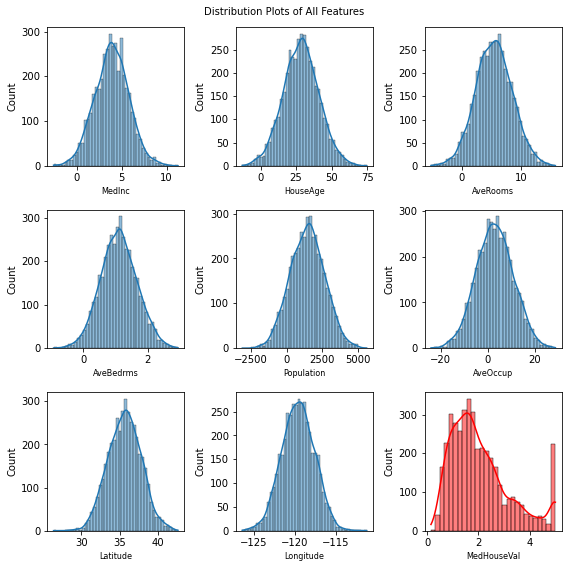

In [16]:
## visualizing feature variables

fig, axes = plt.subplots(3, 3, figsize=(8,8))
fig.suptitle('Distribution Plots of All Features', size=10)

sns.histplot(ax=axes[0,0], x=sampled_train_data["MedInc"], kde=True)
axes[0,0].set_xlabel('MedInc', size=8)

sns.histplot(ax=axes[0,1], x=sampled_train_data["HouseAge"], kde=True)
axes[0,1].set_xlabel('HouseAge', size=8)

sns.histplot(ax=axes[0,2], x=sampled_train_data["AveRooms"], kde=True)
axes[0,2].set_xlabel('AveRooms', size=8)

sns.histplot(ax=axes[1,0], x=sampled_train_data["AveBedrms"], kde=True)
axes[1,0].set_xlabel('AveBedrms', size=8)

sns.histplot(ax=axes[1,1], x=sampled_train_data["Population"], kde=True)
axes[1,1].set_xlabel('Population', size=8)

sns.histplot(ax=axes[1,2], x=sampled_train_data["AveOccup"], kde=True)
axes[1,2].set_xlabel('AveOccup', size=8)

sns.histplot(ax=axes[2,0], x=sampled_train_data["Latitude"], kde=True)
axes[2,0].set_xlabel('Latitude', size=8)

sns.histplot(ax=axes[2,1], x=sampled_train_data["Longitude"], kde=True)
axes[2,1].set_xlabel('Longitude', size=8)

sns.histplot(ax=axes[2,2], x=train_data["MedHouseVal"], kde=True, color='red')
axes[2,2].set_xlabel('MedHouseVal', size=8)

plt.tight_layout()
plt.show()

In [17]:
reg = MyLazyPredict.LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(sampled_train_data, X_test, y_train, y_test)
models

100%|████████████████████████████████████████████████████████████████████████████| 21/21 [00:16<00:00,  1.25it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ElasticNet,-0.00,-0.00,1.15,0.02
ElasticNetCV,-0.00,-0.00,1.15,0.09
Lasso,-0.00,-0.00,1.15,0.02
LassoCV,-0.00,-0.00,1.15,0.09
BayesianRidge,-0.00,-0.00,1.15,0.02
PoissonRegressor,-0.01,-0.01,1.16,0.03
GradientBoostingRegressor,-0.02,-0.02,1.16,1.02
SGDRegressor,-0.03,-0.03,1.17,0.02
RidgeCV,-0.03,-0.03,1.17,0.02


Here, we can see that no model has able to capture the pattern (because, there are not any) as the joint distribution's objective has been compromised when we left the target variable out.

### Conclusion:

In above four experiments, we have seen that the best way of learning the joint distribution is to learn it with all the features and target variables. Also, we have seen, how incorporating the test data can enhance the models' performances. The last experiment was a total failure in terms of the performances as it on the backend did not incorporate the target variable while learning the features.

Learning joint guassian distribution might come handy in different approaches. It can help us track the model performance and see where is it drifting if performing bad for newer records and why.

Also, many times we do not have enough data to learn complex machine learning algorithms, there it can help us generated through sampling enough data to train our models.

In [18]:
gm = GaussianMixture(n_components=1, random_state=0).fit(train_data)
sampled_train_data = pd.DataFrame(gm.sample(len(X_train))[0], columns=housing.columns)
sampled_train_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.69,18.05,10.82,2.18,3593.37,-3.72,40.59,-123.88,2.00
1,5.00,26.05,7.26,1.40,1941.07,-8.10,35.88,-120.82,2.62
2,1.70,36.69,6.90,1.59,1822.02,23.61,37.75,-121.40,3.14
3,3.37,11.42,6.68,1.24,1211.25,-9.49,37.20,-119.49,-0.10
4,2.54,9.56,6.37,1.43,2941.71,6.06,33.02,-116.92,-0.63


In [19]:
## Learning the mean and standard deviation of the 



In [20]:
## Declaring Features and targets

X_train_sampled = sampled_train_data.drop("MedHouseVal", axis=1)
y_train_sampled = sampled_train_data["MedHouseVal"]

In [21]:
reg = MyLazyPredict.LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train_sampled, X_test, y_train_sampled, y_test)
models

 62%|███████████████████████████████████████████████                             | 13/21 [00:06<00:05,  1.51it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.


100%|████████████████████████████████████████████████████████████████████████████| 21/21 [00:15<00:00,  1.33it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LassoCV,0.60,0.60,0.72,0.09
LinearRegression,0.60,0.60,0.72,0.02
RidgeCV,0.60,0.60,0.72,0.02
Ridge,0.60,0.60,0.72,0.02
BayesianRidge,0.60,0.60,0.72,0.02
ElasticNetCV,0.60,0.60,0.72,0.11
LinearSVR,0.60,0.60,0.72,0.05
SGDRegressor,0.60,0.60,0.73,0.02
SVR,0.59,0.59,0.74,6.44


Now, we can see a differnce in metrics. But, still many of the models have succesfully captured some patterns in the dataset.

This time we have used all features and target variable to build our joint guassian distribution. We will now build the mixture using only feautures.